In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Interests.csv")

In [3]:
df.head(5)

,ID,Gender,Annual Expense,Score,Interest Value
0,1,Male,89.3,157,38.6
1,2,Male,24.5,819,71.6
2,3,Female,36.8,171,90.8
3,4,Female,88.1,911,66.3
4,5,Female,11.5,513,33.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              200 non-null    int64  
 1   Gender          200 non-null    object 
 2   Annual Expense  200 non-null    float64
 3   Score           200 non-null    int64  
 4   Interest Value  200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,ID,Annual Expense,Score,Interest Value
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,40.96795,106.145000,50.513500
std,57.879185,16.46873,159.155573,25.227266
min,1.000000,11.50000,23.000000,1.000000
25%,50.750000,29.90750,48.000000,35.000000
50%,100.500000,37.00000,66.000000,50.000000
75%,150.250000,49.25000,86.250000,72.000000
max,200.000000,99.00000,923.000000,99.000000


In [6]:
df.isna().any()

ID                False
Gender            False
Annual Expense    False
Score             False
Interest Value    False
dtype: bool

In [7]:
df.index

RangeIndex(start=0, stop=200, step=1)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
X = df[['Score','Interest Value']]

In [10]:
X = scaler.fit_transform(X)

In [11]:
X = pd.DataFrame(X,columns=['Score','Interest Value'])

# Build clusters using K-means; Cluster=3, metric as Eucledian.

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(n_clusters=3)

In [13]:
km.cluster_centers_

array([[-0.23558744, -0.59915217],
       [ 3.94565104,  0.05979474],
       [-0.21906002,  1.05646575]])

In [14]:
km.inertia_

99.39894282864049

In [15]:
res = X.copy()
km_pred = km.predict(X)
res['Cluster'] = km_pred

<AxesSubplot:xlabel='Score', ylabel='Interest Value'>

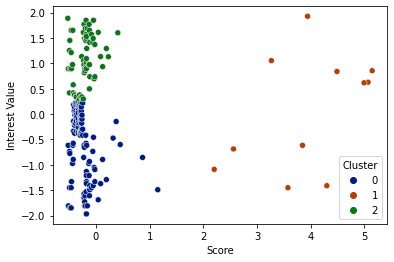

In [16]:
sns.scatterplot(x='Score',y='Interest Value',data=res,hue='Cluster',palette='dark')

# Print the k value and SSE

In [17]:
k = []
i = []

In [18]:
for a in range(1,16,1):
    km = KMeans(n_clusters=a)
    km.fit(X)
    k.append(a)
    i.append(km.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[Text(0.5, 0, 'no. of cluster'), Text(0, 0.5, 'WCSS')]

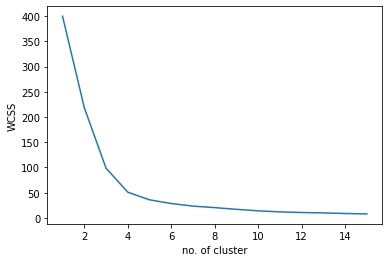

In [19]:
sns.lineplot(x=k,y=i,).set(xlabel="no. of cluster",ylabel="WCSS")

In [20]:
km_op = KMeans(n_clusters=5)
km_op.fit(X)
km_op.inertia_

35.88531135614644

In [21]:
res_op = X.copy()
km_op_pred = km_op.predict(X)
res_op['Cluster'] = km_op_pred

<AxesSubplot:xlabel='Score', ylabel='Interest Value'>

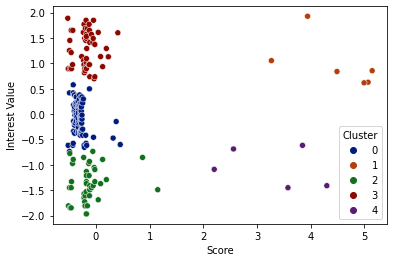

In [22]:
sns.scatterplot(x='Score',y='Interest Value',data=res_op,hue='Cluster',palette='dark')

# Agglomerative Clustering and Dendrogram tree

In [23]:
df1 = df.sample(n=10)
X1 = df1[['Score','Interest Value']]

In [24]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
X_scaler1 = scaler.fit_transform(X1)

X_normalize = normalize(X_scaler1)
print(type(X_normalize))

<class 'numpy.ndarray'>


In [25]:
X_normalize = pd.DataFrame(X_normalize,columns=['Score','Interest Value'])

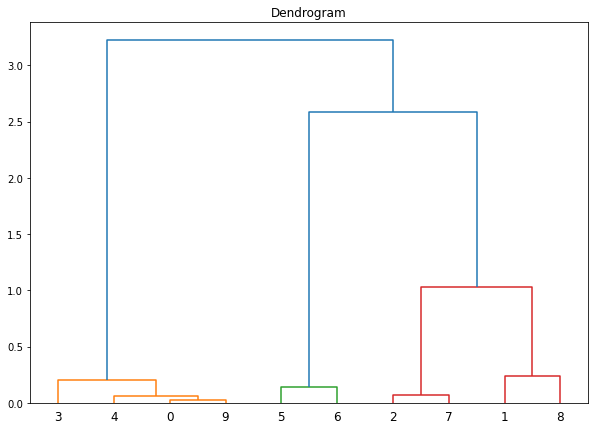

In [26]:
import scipy.cluster.hierarchy as shc
link = shc.linkage(X_normalize,method='ward')
plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = shc.dendrogram(link)

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
y = cluster.fit_predict(X_normalize)

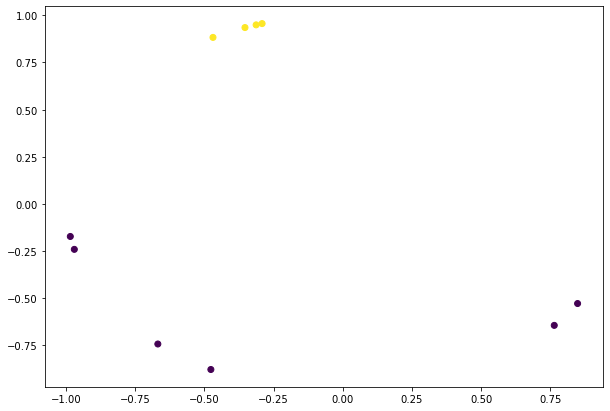

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_normalize['Score'],X_normalize['Interest Value'],c=cluster.labels_)